## Importing Libraries 

In [52]:
import numpy as np
import math 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import sklearn
import time

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import xgboost as xgb


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 

pd.set_option('display.max_rows', 100) 

pd.set_option('max_columns', None)


import warnings
warnings.filterwarnings('ignore')

## Load Data

In [88]:
train_df = pd.read_csv("aug_train.csv")

train_df = train_df.drop(['enrollee_id', 'city', 'company_size'], axis = 1)


## Exploring Data

In [54]:
train_df.shape

(19158, 11)

In [55]:
test_df.shape

(2129, 10)

In [56]:
train_df.isna().any()

city_development_index    False
gender                     True
relevent_experience       False
enrolled_university        True
education_level            True
major_discipline           True
experience                 True
company_type               True
last_new_job               True
training_hours            False
target                    False
dtype: bool

In [57]:
test_df.isna().any()

city_development_index    False
gender                     True
relevent_experience       False
enrolled_university        True
education_level            True
major_discipline           True
experience                 True
company_type               True
last_new_job               True
training_hours            False
dtype: bool

In [87]:
train_df.head(10)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
1,0.776,1,0,2,0,5,15,5,5,47,0
4,0.767,1,1,2,1,5,20,1,4,8,0
7,0.762,1,1,2,0,5,13,5,5,18,1
8,0.920,1,1,2,0,5,7,5,1,46,1
11,0.920,1,1,2,0,5,5,5,1,108,0
12,0.913,1,1,2,0,5,20,5,3,23,0
15,0.926,1,1,2,0,5,16,5,5,18,0
20,0.843,1,1,2,1,5,11,5,1,68,0
21,0.926,1,1,2,1,5,11,5,2,50,0
23,0.776,1,1,2,0,2,0,5,1,65,0


In [59]:
train_df['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [60]:
train_df.dtypes

city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

## Data Cleaning 

In [61]:
train_df['relevent_experience'] = train_df['relevent_experience'].replace(['Has relevent experience', 'No relevent experience'], ['Yes', 'No'])

In [62]:
train_df['experience'] = train_df['experience'].replace(['>20', '<1'], ['20', '0'])

In [63]:
train_df = train_df.dropna()

In [64]:
train_df['experience'] = train_df['experience'].astype('int32')

In [65]:
train_df['last_new_job'] = train_df['last_new_job'].replace(['>4', 'never'], ['5', '0'])
train_df['last_new_job'] = train_df['last_new_job'].astype('int32')

In [66]:
train_df['target'] = train_df['target'].astype('int32')

## Exploratory Data Analysis (EDA)

<Figure size 1008x576 with 0 Axes>

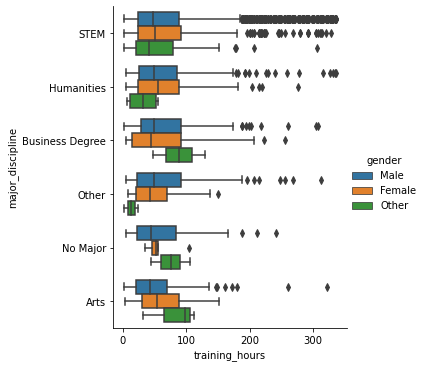

In [68]:
plt.figure(figsize =(14,8))
sns.catplot(data = train_df, x = 'training_hours', y = 'major_discipline', kind = 'box', orient = 'h', hue = 'gender')

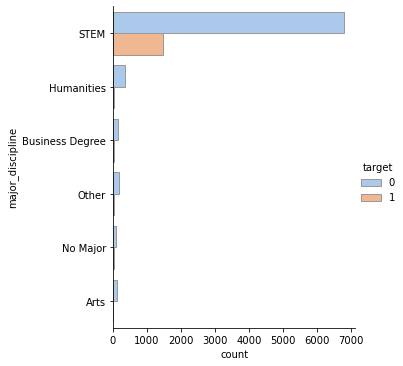

In [69]:
sns.catplot(y = 'major_discipline', hue = 'target', kind = 'count', palette = 'pastel', edgecolor = '.6', data = train_df )

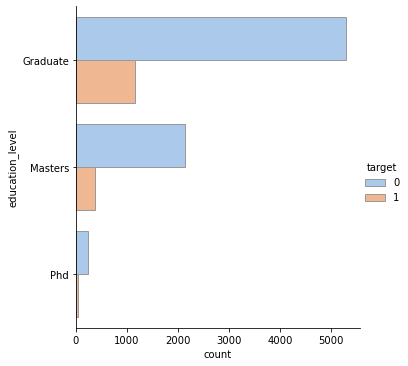

In [70]:
sns.catplot(y = 'education_level', hue = 'target', kind = 'count', palette = 'pastel', edgecolor = '.6', data = train_df )

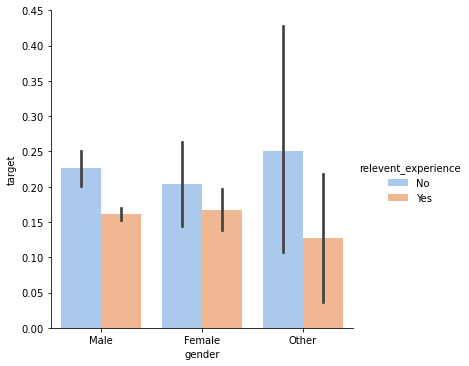

In [71]:
sns.catplot(x="gender", y="target", hue="relevent_experience", palette="pastel", kind="bar", data=train_df)

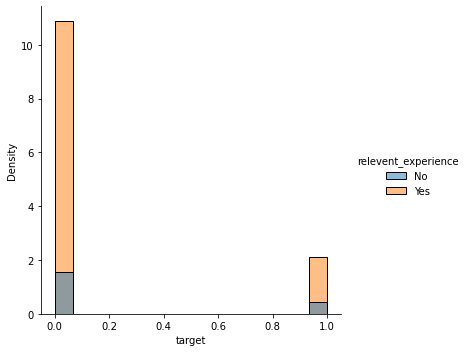

In [72]:
sns.displot(train_df, x="target", hue="relevent_experience",  stat="density")

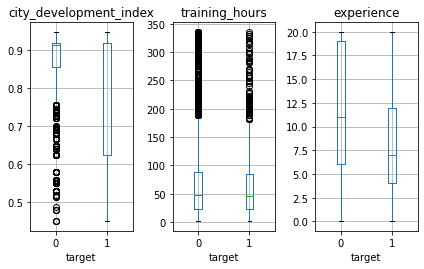

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=3)
train_df.boxplot(column = 'city_development_index', by = 'target', ax = axes[0])
train_df.boxplot(column = 'training_hours', by = 'target', ax = axes[1])
train_df.boxplot(column = 'experience', by = 'target', ax = axes[2])


for ax in axes:
    ax.set_xlabel('target')
    
plt.suptitle('')
plt.tight_layout()

<AxesSubplot:>

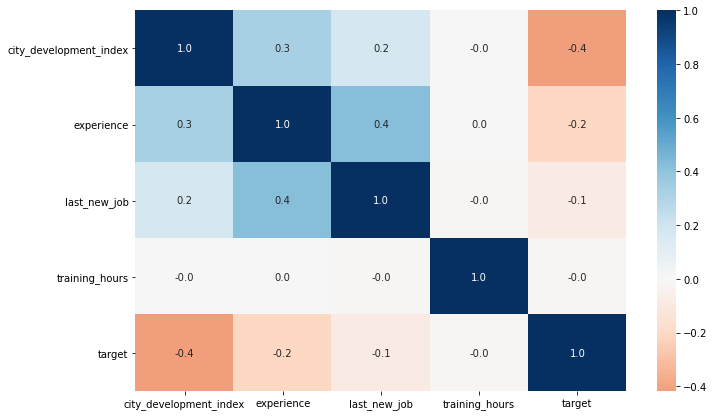

In [74]:
corr = train_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,7)
sns.heatmap(corr, annot = True, fmt = ".1f", cmap = 'RdBu', center = 0, ax = ax)

## Encoding Categorical Variables 

In [75]:
le = LabelEncoder()
train_df['education_level'] = le.fit_transform(train_df['education_level'])
train_df['gender'] = le.fit_transform(train_df['gender'])
train_df['enrolled_university'] = le.fit_transform(train_df['enrolled_university'])
train_df['major_discipline'] = le.fit_transform(train_df['major_discipline'])
train_df['company_type'] = le.fit_transform(train_df['company_type'])
train_df['relevent_experience'] = le.fit_transform(train_df['relevent_experience'])


## Training and testing data split

In [77]:
X = train_df.drop(columns = ["target"], axis = 1)
y = train_df['target']

In [78]:
X_train, X_valid, y_train, y_valid = train_test_split( X, y, test_size=0.3, random_state=42)

## Model Building 

In [79]:
parameters = {
        'max_depth': range(2, 6),
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'subsample': [0.6, 0.7, 0.8],
        'colsample_bytree': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'colsample_bynode': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'gamma': [0, 5, 10, 15, 20],
        'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
        'lambda': [0.1, 0.25, 0.5, 0.75, 1]
}

start = time.time() 

clf = RandomizedSearchCV(xgb.XGBClassifier(use_label_encoder = False, eval_metric = "logloss"), 
                         parameters, n_jobs=4, scoring = "roc_auc", n_iter = 300,
                         random_state = 123)

clf.fit(X_train, y_train)

end = time.time()

# print the number of seconds it takes to run the hyperparameter search
print("Total time in seconds ==> ", end - start)

Total time in seconds ==>  790.2808721065521


In [80]:
clf.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'max_depth': 2,
 'learning_rate': 0.25,
 'lambda': 0.25,
 'gamma': 15,
 'colsample_bytree': 0.8,
 'colsample_bynode': 0.4}

## Model Performance

In [81]:
## Create a data frame with the feature importances
###################################################
# First create an empty data frame
imp = pd.DataFrame()

# add a column for the variable names
imp["var"] = X_train.columns

# add a column with the feature importances
imp["imp"] = clf.best_estimator_.feature_importances_

# sort the data frame by the feature importances in descending order - most important features at the top
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)

# print out the data frame
imp

,var,imp
0,city_development_index,0.581219
1,experience,0.170127
2,enrolled_university,0.137504
3,company_type,0.051874
4,relevent_experience,0.031014
5,last_new_job,0.028263
6,gender,0.000000
7,education_level,0.000000
8,major_discipline,0.000000
9,training_hours,0.000000


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance score', ylabel='Features'>

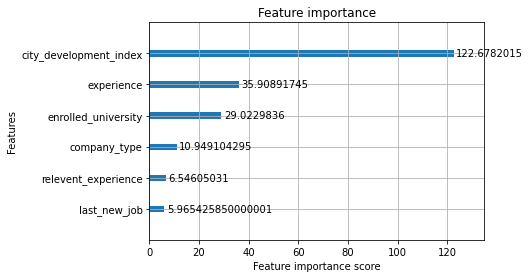

In [82]:
# non-normalized feature importance
# XGBoost has a built-in function to plot importance
xgb.plot_importance(clf.best_estimator_, importance_type = "gain", xlabel = "Feature importance score")

In [83]:
y_train_prob = clf.predict_proba(X_train) 
y_val_prob = clf.predict_proba(X_valid)

In [84]:
thresh = np.arange(0.01, 1, .01) # create array 0.01, 0.02, 0.03, ..., 0.99

# create empty lists for each metric
precision_values = []
recall_values = []
acc_values = []
f1_values = []

# Loop through each threshold value - .01, .02, .03, ..., .99
for val in thresh:
    
    # get 1 / 0 predictions based off probability threshold
    pred = [1 if prob >= val else 0 for prob in y_train_prob[:,1]]
    
    # calculate precision, recall, accuracy, and f1-score
    precision = metrics.precision_score(y_train, pred)
    recall = metrics.recall_score(y_train, pred)
    accuracy = metrics.accuracy_score(y_train, pred)
    f1_score = metrics.f1_score(y_train, pred)
    
    # add precision, recall, accuracy, and f1-score to their respective lists
    precision_values.append(precision)
    recall_values.append(recall)
    acc_values.append(accuracy)
    f1_values.append(f1_score)

# put precision, recall, and accuracy values into a data frame
result = pd.DataFrame()
result["threshold"] = thresh
result["precision"] = precision_values
result["recall"] = recall_values
result["accuracy"] = acc_values
result["f1_score"] = f1_values

result 

,threshold,precision,recall,accuracy,f1_score
0,0.01,0.174296,1.000000,0.174296,0.296852
1,0.02,0.174296,1.000000,0.174296,0.296852
2,0.03,0.174296,1.000000,0.174296,0.296852
3,0.04,0.174296,1.000000,0.174296,0.296852
4,0.05,0.174296,1.000000,0.174296,0.296852
5,0.06,0.174296,1.000000,0.174296,0.296852
6,0.07,0.174296,1.000000,0.174296,0.296852
7,0.08,0.208419,0.900621,0.386483,0.338503
8,0.09,0.234131,0.850932,0.488865,0.367222
9,0.10,0.268351,0.801242,0.584596,0.402048


In [85]:
result.iloc[result.f1_score.idxmax()]

threshold    0.180000
precision    0.574107
recall       0.570541
accuracy     0.851376
f1_score     0.572319
Name: 17, dtype: float64

In [86]:
## Use above threshold to calculate accuracy, precision, recall, and F1-score on validation set

# get 1 / 0 predictions based off probability threshold
pred = [1 if prob >= 0.4 else 0 for prob in y_val_prob[:,1]]

# calculate precision, recall, accuracy, and f1-score
precision = metrics.precision_score(y_valid, pred)
recall = metrics.recall_score(y_valid, pred)
accuracy = metrics.accuracy_score(y_valid, pred)
f1_score = metrics.f1_score(y_valid, pred)

print("Validation precision: ", precision)
print("Validation recall: ", recall)
print("Validation accuracy: ", accuracy)
print("Validation F1-Score: ", f1_score)

Validation precision:  0.5725806451612904
Validation recall:  0.47651006711409394
Validation accuracy:  0.8582251082251082
Validation F1-Score:  0.5201465201465202
